In [87]:
%matplotlib inline
import numpy
import sklearn
import sklearn.datasets
import sklearn.metrics
import sklearn.preprocessing
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import data
Split into training and testing sets

In [97]:
digits = sklearn.datasets.load_digits()
test_size = 797/1797
shuffle = False
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=test_size, shuffle=shuffle)

assert X_train.shape == (1000, 64), X_train.shape
assert Y_test.shape == (797, ), X_train.shape

## Encode for classification

In [99]:
labelencoder = sklearn.preprocessing.OneHotEncoder()
Y_train_labeled = labelencoder.fit_transform(Y_train.reshape(-1,1)).todense()
Y_test_labeled = labelencoder.fit_transform(Y_test.reshape(-1,1)).todense()

assert Y_train_labeled.shape == (1000, 10), Y_train_labeled.shape

## Build PLSR models

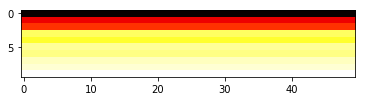

array([[0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547,
        0.70012547, 0.70012547, 0.70012547, 0.70012547, 0.70012547],
       [0.76537014, 0.76537014, 0.76537014, 0.76537014, 0.76537014,
        0.76537014, 0.76537014, 0.76537014, 0.76537014, 0.76537014,
        0.76537014, 0.76537014, 0.76537014, 0.76537014, 0.76537014,
        0.76537014, 0.76537014, 0.76537014, 0.76537014, 0.76537014,
        0.76537014, 0.76537014, 0.76537014, 0.7

In [108]:
train_components = 50
def build_plsr(X, Y):
    assert X.shape[0] == Y.shape[0]
    m = PLSRegression(n_components=train_components)
    m.fit(X, Y)
    return m

models = [ build_plsr(X_train[0:rows_used,:], Y_train_labeled[0:rows_used]) for rows_used in range(100, 1100, 100) ]
assert len(models) == 10

results = numpy.ndarray(shape=(len(models), train_components))
for x_idx, predict_components in enumerate(range(1, train_components+1)):
    for y_idx, model in enumerate(models):
        Y_pred = model.predict(X_test).argmax(axis=1)
        #print(Y_test.shape, Y_test[0:5])
        #print(Y_pred.shape, Y_pred[0:5])

        # classification accuracy
        a = sklearn.metrics.accuracy_score(Y_test, Y_pred)
        # L00_iris_pcr_plsr_ALT2.py 
        results[y_idx, x_idx] = a

plt.imshow(results, cmap='hot', interpolation='nearest')
plt.show()

results

The MNIST data in scikit-learn consists of 1797 objects (instances). Split the data into a training set (first 1000 rows) and test set (last 797 rows). The test set will serve as “unseen” data for which we will predict the classes. Don’t worry about the balance of classes in the training set; their proportions stay very similar with increasing number of rows.


Compute 10 PLSR models, each with 50 components.
        Use the first 100 rows of the training set to compute the first PLSR model.
        Use the first 200 rows of the training set to compute the second PLSR model.
        Use the first 300 rows of the training set to compute the third PLSR model.
        etc
        
For each of the 10 models, predict the classes of the unseen digits using 1 component, 2 components, 3 components, etc. and compute the classification accuracy (which should be value between 0 and 1, or between 0 and 100 if computed as a percentage) from the predictions. Store the results in a (10 x 50) numpy array or pandas data frame.


Plot a heatmap of the results using Python plotting packages matplotlib (Lenker til en ekstern side.)Lenker til en ekstern side. or seaborn (Lenker til en ekstern side.)Lenker til en ekstern side.. See below what it should look like.

In [ ]:



a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

* Does the number of training objects matter for prediction performance?
* Do the number of components used in the prediction matter for prediction performance?
* Which combination of the number of training objects and number of components used for prediction would you use?
* Do you think the accuracy achieved with PLSR may be further improved using other classification methods?